### Team 23 - Question 3


### Import statements 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

### Class and function definitions

In [2]:
class Perceptron:
    
    def __init__(self, eta):
        self.eta = eta
        
    def f(self, s, beta = 100):
        return 1/(1+np.exp(-beta*s))
        
    def one_epoch(self, X, Y):
        w_old = self.w.copy()

        for t in range(X.shape[0]):
            xt = X[t, :]
            yt = Y[t]
            if yt*(np.dot(w_old, xt)) <= 0:
                w_new = w_old + self.eta*yt*xt 
            else:
                w_new = w_old
            w_old = w_new
        self.w = w_new
    
    def line(self, w, X):
        x = np.linspace(np.min(X[:, 1])-1 , np.max(X[:, 1])+1, 50)
        c = -w[0]/w[-1]
        m = -w[1]/w[-1]
        y = m*x + c
        return x,y 

    def predict(self, w, X):   
        Y_hat = np.zeros(X.shape[0])
        class_1 = np.argwhere(np.dot(X, w) >= 0)
        class_0 = np.argwhere(np.dot(X, w) < 0)
        Y_hat[class_1] = 1
        Y_hat[class_0] = -1
        return Y_hat   
        
    def accuracy(self, Y_true, Y_pred):

    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere(Y_true==Y_pred))
        N  = Y_true.shape[0]
        return tp/N
   
    def train(self, X, Y, max_iter=10000):
        
        epoch = 0
        while epoch<max_iter:
            epoch += 1
            if epoch == 1:
                self.w =np.ones(X.shape[1])
                error_old = -10
            else:
                error_old = error_new
            self.one_epoch(X,Y)
            
            Y_hat = self.predict(self.w, X)
            error_new = 1 - self.accuracy(Y, Y_hat)
            print('Epoch: {0}, Error: {1}'.format(epoch, error_new))
            
#             xl, yl = self.line(self.w, X)
#             classes = np.unique(Y)
#             for c in classes:
#                 x_c = X[np.argwhere(Y==c).ravel(),:]
#                 plt.plot(x_c[:,1], x_c[:,2],'.')

#             plt.title('Scatter Plot')
#             plt.legend(['Class 0','Class 1'])
#             plt.plot(xl, yl, 'k--')
#             plt.xlabel('x_1')
#             plt.ylabel('x_2')
#             plt.show()

            if abs(error_old-error_new)/error_new < 0.0001 and error_new < 0.01:
                break
        if epoch == max_iter:
            print('Did not converge!')
                  

In [3]:
def confusion_matrix_plot(Y_true, Y_pred, return_mat = False, title_suffix=None):
    
# Plots and returns the confusion matrix (if asked) given the predictions and the the true labels
# Inputs:
#     Y_true ------> True class labels
#     Y_pred ------> Predicted class labels
#     return_mat --> Flag to specify if confusion matrix should be returned 
# Returns:
#     conf_mat ------> Confusion Matrix (if return_mat=True)

    n_classes = len(np.unique(Y_true))
    conf_mat = np.zeros((n_classes,n_classes))
    for i in range(n_classes):
        for j in range(n_classes):
            true_i = np.argwhere(Y_true==i).ravel()
            pred_j = np.argwhere(Y_pred==j).ravel()
            conf_mat[i][j] = int(len(np.intersect1d(true_i, pred_j)))
    
    conf_percentage = np.around((conf_mat*100/np.sum(conf_mat)), decimals=2)
    conf_percentage = np.array(list(map(lambda x: str(x) +'%', conf_percentage.ravel()))).reshape(n_classes,n_classes)
    
    h = np.around(list(np.diag(conf_mat)*100/np.sum(conf_mat, axis = 0)) + [100*np.sum(np.diag(conf_mat))/np.sum(conf_mat)], decimals=1)
    h_neg = np.around(list(100 - h), decimals=1)
    v = np.around(np.diag(conf_mat)*100/np.sum(conf_mat, axis = 1), decimals=1)
    v_neg = np.around(100 - v, decimals=1)

    v_new = np.array(list(map(lambda x: str(x) +'%', v)))
    h_new = np.array(list(map(lambda x: str(x) +'%', h)))
    
    v_neg_new = np.array(list(map(lambda x: str(x) +'%', v_neg)))
    h_neg_new = np.array(list(map(lambda x: str(x) +'%', h_neg)))
    
    
    label_up = np.vstack((np.vstack((conf_mat.astype(str).T,v_new)).T, h_new))
    label_down = np.vstack((np.vstack((conf_percentage.astype(str).T,v_neg_new)).T, h_neg_new))
    label_all = np.array(list(map(lambda x, y: str(x) + '\n' + str(y), list(label_up.ravel()), list(label_down.ravel())))).reshape(n_classes+1, n_classes+1)
    
    dummy = (np.min(conf_mat)+np.max(conf_mat))/2
    labels = ['Class {}'.format(c) for c in list(np.unique(Y).astype(str))] + ['Sum']
    conf_df = pd.DataFrame(np.vstack((np.vstack((conf_mat,np.array([dummy]*n_classes))).T,[dummy]*(n_classes+1))), index = labels, columns = labels)
    
    sns.set(rc={'figure.figsize':(6,6)})
    ax = sns.heatmap(conf_df, annot=label_all, fmt = '', annot_kws={"size": 15}, cbar=False, cmap='summer', linecolor='k', linewidths=.1, square= True) 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_facecolor("grey")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if title_suffix == None:
        plt.title('Confusion Matrix')
    else:
        plt.title('Confusion Matrix - ' + title_suffix)
    plt.show()
            
    if return_mat == True:
        return conf_mat              

In [4]:
# def decision_region(x_train, y_train, svc_clf):
    
# # Plots the decision region
# # Inputs:
# #     x_train ---------> Training Datapoints
# #     y_train ---------> Class labels for x_train
# #     svc_clf --------->

# # Returns:
# #     None  

#     x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
#     y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
#     h = .2  
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
#     x = np.c_[xx.ravel(), yy.ravel()]
#     y_pred = svc_clf.predict(x)
#     support_vectors = svc_clf.support_vectors_
#     y_pred = np.array(y_pred).reshape(xx.shape)
#     classes = np.unique(y_train).astype(str)
    
#     plt.style.use('classic')
#     plt.pcolormesh(xx, yy, y_pred, cmap=plt.cm.Paired)
#     scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
#     scatter_sv = plt.scatter(support_vectors[:,0], support_vectors[:,1], c='g', edgecolors='k')
    
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("Decision Boundary: ")
#     plt.xlabel('x_1')
#     plt.ylabel('x_2')
#     plt.legend(handles=scatter.legend_elements()[0] + [scatter_sv], labels=list(map(lambda x: 'Class {}'.format(x), classes))+['Support vectors'])
#     plt.show()

### Loading the Dataset 1


In [5]:
data = pd.read_csv('Dataset_1_Team_23.csv')

In [6]:
data.head()

,# x_1,x_2,Class_label
0,333.294067,142.144826,0
1,-135.877074,311.931325,1
2,-136.094438,245.143666,1
3,373.793832,173.253520,0
4,-81.378934,229.592066,1


In [7]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

### Visualising the data

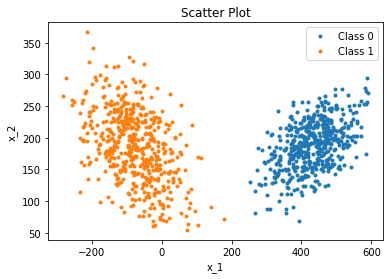

In [8]:
classes = np.unique(Y)
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1','Class 2'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Appending with 1s

In [9]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [10]:
eta = 0.1         # learning rate
per = Perceptron(eta)

In [11]:
per.train(X_train_a, Y_train)

Epoch: 1, Error: 0.007499999999999951
Epoch: 2, Error: 0.010000000000000009
Epoch: 3, Error: 0.010000000000000009
Epoch: 4, Error: 0.010000000000000009
Epoch: 5, Error: 0.010000000000000009
Epoch: 6, Error: 0.007499999999999951
Epoch: 7, Error: 0.007499999999999951


### Loading the Dataset 3

In [12]:
data = pd.read_csv('Dataset_3_Team_23.csv')

In [13]:
data.head()

,# x_1,x_2,Class_label
0,0.302069,-0.547271,1
1,-0.797395,-0.724008,0
2,-0.932978,0.135196,0
3,0.639708,-0.261620,1
4,0.195793,1.072244,0


In [14]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]]

### Visualising the data

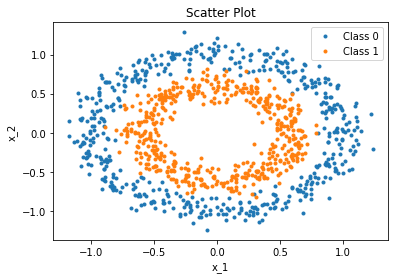

In [15]:

classes = np.unique(Y)
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1','Class 2'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 


### Appending with 1s

In [16]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [17]:
eta = 0.1         # learning rate
per = Perceptron(eta)

In [18]:
per.train(X_train_a, Y_train)

Epoch: 1, Error: 0.60625
Epoch: 2, Error: 0.60625
Epoch: 3, Error: 0.605
Epoch: 4, Error: 0.6074999999999999
Epoch: 5, Error: 0.60375
Epoch: 6, Error: 0.6025
Epoch: 7, Error: 0.60625
Epoch: 8, Error: 0.61
Epoch: 9, Error: 0.605
Epoch: 10, Error: 0.6012500000000001
Epoch: 11, Error: 0.61
Epoch: 12, Error: 0.61375
Epoch: 13, Error: 0.615
Epoch: 14, Error: 0.605
Epoch: 15, Error: 0.6012500000000001
Epoch: 16, Error: 0.60625
Epoch: 17, Error: 0.60875
Epoch: 18, Error: 0.6112500000000001
Epoch: 19, Error: 0.49875
Epoch: 20, Error: 0.6012500000000001
Epoch: 21, Error: 0.61
Epoch: 22, Error: 0.60375
Epoch: 23, Error: 0.57875
Epoch: 24, Error: 0.505
Epoch: 25, Error: 0.59875
Epoch: 26, Error: 0.6112500000000001
Epoch: 27, Error: 0.60375
Epoch: 28, Error: 0.5862499999999999
Epoch: 29, Error: 0.5825
Epoch: 30, Error: 0.6012500000000001
Epoch: 31, Error: 0.6112500000000001
Epoch: 32, Error: 0.60375
Epoch: 33, Error: 0.6074999999999999
Epoch: 34, Error: 0.6125
Epoch: 35, Error: 0.6074999999999999


Epoch: 284, Error: 0.61375
Epoch: 285, Error: 0.62
Epoch: 286, Error: 0.6112500000000001
Epoch: 287, Error: 0.60625
Epoch: 288, Error: 0.60625
Epoch: 289, Error: 0.605
Epoch: 290, Error: 0.60375
Epoch: 291, Error: 0.60625
Epoch: 292, Error: 0.62
Epoch: 293, Error: 0.6074999999999999
Epoch: 294, Error: 0.6
Epoch: 295, Error: 0.5237499999999999
Epoch: 296, Error: 0.6112500000000001
Epoch: 297, Error: 0.595
Epoch: 298, Error: 0.60875
Epoch: 299, Error: 0.61875
Epoch: 300, Error: 0.5725
Epoch: 301, Error: 0.6025
Epoch: 302, Error: 0.6012500000000001
Epoch: 303, Error: 0.605
Epoch: 304, Error: 0.61
Epoch: 305, Error: 0.5662499999999999
Epoch: 306, Error: 0.605
Epoch: 307, Error: 0.6074999999999999
Epoch: 308, Error: 0.6125
Epoch: 309, Error: 0.60375
Epoch: 310, Error: 0.60375
Epoch: 311, Error: 0.61875
Epoch: 312, Error: 0.61
Epoch: 313, Error: 0.60875
Epoch: 314, Error: 0.6112500000000001
Epoch: 315, Error: 0.5487500000000001
Epoch: 316, Error: 0.6025
Epoch: 317, Error: 0.6012500000000001


Epoch: 564, Error: 0.60625
Epoch: 565, Error: 0.6012500000000001
Epoch: 566, Error: 0.61
Epoch: 567, Error: 0.60875
Epoch: 568, Error: 0.6074999999999999
Epoch: 569, Error: 0.5775
Epoch: 570, Error: 0.6074999999999999
Epoch: 571, Error: 0.605
Epoch: 572, Error: 0.6112500000000001
Epoch: 573, Error: 0.605
Epoch: 574, Error: 0.60875
Epoch: 575, Error: 0.6174999999999999
Epoch: 576, Error: 0.57375
Epoch: 577, Error: 0.5974999999999999
Epoch: 578, Error: 0.5825
Epoch: 579, Error: 0.6125
Epoch: 580, Error: 0.60875
Epoch: 581, Error: 0.61
Epoch: 582, Error: 0.6
Epoch: 583, Error: 0.6212500000000001
Epoch: 584, Error: 0.615
Epoch: 585, Error: 0.60875
Epoch: 586, Error: 0.6012500000000001
Epoch: 587, Error: 0.60875
Epoch: 588, Error: 0.6212500000000001
Epoch: 589, Error: 0.5449999999999999
Epoch: 590, Error: 0.6125
Epoch: 591, Error: 0.6112500000000001
Epoch: 592, Error: 0.6174999999999999
Epoch: 593, Error: 0.605
Epoch: 594, Error: 0.6012500000000001
Epoch: 595, Error: 0.60375
Epoch: 596, Err

Epoch: 840, Error: 0.6074999999999999
Epoch: 841, Error: 0.60625
Epoch: 842, Error: 0.60625
Epoch: 843, Error: 0.605
Epoch: 844, Error: 0.605
Epoch: 845, Error: 0.61375
Epoch: 846, Error: 0.6074999999999999
Epoch: 847, Error: 0.605
Epoch: 848, Error: 0.6
Epoch: 849, Error: 0.6025
Epoch: 850, Error: 0.61
Epoch: 851, Error: 0.6125
Epoch: 852, Error: 0.6112500000000001
Epoch: 853, Error: 0.59375
Epoch: 854, Error: 0.60875
Epoch: 855, Error: 0.61875
Epoch: 856, Error: 0.5725
Epoch: 857, Error: 0.6025
Epoch: 858, Error: 0.6
Epoch: 859, Error: 0.61625
Epoch: 860, Error: 0.61
Epoch: 861, Error: 0.60625
Epoch: 862, Error: 0.6112500000000001
Epoch: 863, Error: 0.6
Epoch: 864, Error: 0.6074999999999999
Epoch: 865, Error: 0.6112500000000001
Epoch: 866, Error: 0.6074999999999999
Epoch: 867, Error: 0.60625
Epoch: 868, Error: 0.60625
Epoch: 869, Error: 0.605
Epoch: 870, Error: 0.6025
Epoch: 871, Error: 0.6112500000000001
Epoch: 872, Error: 0.605
Epoch: 873, Error: 0.60875
Epoch: 874, Error: 0.617499

Epoch: 1122, Error: 0.60625
Epoch: 1123, Error: 0.605
Epoch: 1124, Error: 0.60375
Epoch: 1125, Error: 0.60875
Epoch: 1126, Error: 0.60625
Epoch: 1127, Error: 0.60625
Epoch: 1128, Error: 0.62
Epoch: 1129, Error: 0.60375
Epoch: 1130, Error: 0.6074999999999999
Epoch: 1131, Error: 0.60875
Epoch: 1132, Error: 0.6074999999999999
Epoch: 1133, Error: 0.62
Epoch: 1134, Error: 0.60375
Epoch: 1135, Error: 0.60625
Epoch: 1136, Error: 0.615
Epoch: 1137, Error: 0.6112500000000001
Epoch: 1138, Error: 0.60375
Epoch: 1139, Error: 0.6
Epoch: 1140, Error: 0.61
Epoch: 1141, Error: 0.60875
Epoch: 1142, Error: 0.6125
Epoch: 1143, Error: 0.5525
Epoch: 1144, Error: 0.6074999999999999
Epoch: 1145, Error: 0.6074999999999999
Epoch: 1146, Error: 0.6
Epoch: 1147, Error: 0.57875
Epoch: 1148, Error: 0.505
Epoch: 1149, Error: 0.59875
Epoch: 1150, Error: 0.6112500000000001
Epoch: 1151, Error: 0.605
Epoch: 1152, Error: 0.5762499999999999
Epoch: 1153, Error: 0.5700000000000001
Epoch: 1154, Error: 0.60625
Epoch: 1155, Er

Epoch: 1389, Error: 0.60875
Epoch: 1390, Error: 0.6125
Epoch: 1391, Error: 0.5525
Epoch: 1392, Error: 0.6074999999999999
Epoch: 1393, Error: 0.61375
Epoch: 1394, Error: 0.60625
Epoch: 1395, Error: 0.6012500000000001
Epoch: 1396, Error: 0.6112500000000001
Epoch: 1397, Error: 0.585
Epoch: 1398, Error: 0.61
Epoch: 1399, Error: 0.61375
Epoch: 1400, Error: 0.60625
Epoch: 1401, Error: 0.6112500000000001
Epoch: 1402, Error: 0.60875
Epoch: 1403, Error: 0.6074999999999999
Epoch: 1404, Error: 0.60375
Epoch: 1405, Error: 0.61
Epoch: 1406, Error: 0.6074999999999999
Epoch: 1407, Error: 0.6112500000000001
Epoch: 1408, Error: 0.6074999999999999
Epoch: 1409, Error: 0.6074999999999999
Epoch: 1410, Error: 0.60625
Epoch: 1411, Error: 0.605
Epoch: 1412, Error: 0.605
Epoch: 1413, Error: 0.61375
Epoch: 1414, Error: 0.6074999999999999
Epoch: 1415, Error: 0.605
Epoch: 1416, Error: 0.6
Epoch: 1417, Error: 0.55125
Epoch: 1418, Error: 0.6074999999999999
Epoch: 1419, Error: 0.6074999999999999
Epoch: 1420, Error: 

Epoch: 1667, Error: 0.60375
Epoch: 1668, Error: 0.60875
Epoch: 1669, Error: 0.6112500000000001
Epoch: 1670, Error: 0.6125
Epoch: 1671, Error: 0.6112500000000001
Epoch: 1672, Error: 0.6025
Epoch: 1673, Error: 0.605
Epoch: 1674, Error: 0.6
Epoch: 1675, Error: 0.60875
Epoch: 1676, Error: 0.6112500000000001
Epoch: 1677, Error: 0.6212500000000001
Epoch: 1678, Error: 0.60875
Epoch: 1679, Error: 0.61
Epoch: 1680, Error: 0.60625
Epoch: 1681, Error: 0.605
Epoch: 1682, Error: 0.6012500000000001
Epoch: 1683, Error: 0.6112500000000001
Epoch: 1684, Error: 0.60875
Epoch: 1685, Error: 0.60625
Epoch: 1686, Error: 0.60875
Epoch: 1687, Error: 0.6112500000000001
Epoch: 1688, Error: 0.60625
Epoch: 1689, Error: 0.60875
Epoch: 1690, Error: 0.61875
Epoch: 1691, Error: 0.57375
Epoch: 1692, Error: 0.6074999999999999
Epoch: 1693, Error: 0.61
Epoch: 1694, Error: 0.60625
Epoch: 1695, Error: 0.60875
Epoch: 1696, Error: 0.6074999999999999
Epoch: 1697, Error: 0.60875
Epoch: 1698, Error: 0.61
Epoch: 1699, Error: 0.61

Epoch: 1945, Error: 0.5762499999999999
Epoch: 1946, Error: 0.5700000000000001
Epoch: 1947, Error: 0.60625
Epoch: 1948, Error: 0.60875
Epoch: 1949, Error: 0.6112500000000001
Epoch: 1950, Error: 0.49750000000000005
Epoch: 1951, Error: 0.6012500000000001
Epoch: 1952, Error: 0.61
Epoch: 1953, Error: 0.605
Epoch: 1954, Error: 0.60375
Epoch: 1955, Error: 0.57375
Epoch: 1956, Error: 0.57125
Epoch: 1957, Error: 0.60875
Epoch: 1958, Error: 0.6074999999999999
Epoch: 1959, Error: 0.59625
Epoch: 1960, Error: 0.60875
Epoch: 1961, Error: 0.6212500000000001
Epoch: 1962, Error: 0.5449999999999999
Epoch: 1963, Error: 0.6125
Epoch: 1964, Error: 0.6112500000000001
Epoch: 1965, Error: 0.6174999999999999
Epoch: 1966, Error: 0.605
Epoch: 1967, Error: 0.6012500000000001
Epoch: 1968, Error: 0.605
Epoch: 1969, Error: 0.60875
Epoch: 1970, Error: 0.6112500000000001
Epoch: 1971, Error: 0.60625
Epoch: 1972, Error: 0.6
Epoch: 1973, Error: 0.6112500000000001
Epoch: 1974, Error: 0.6025
Epoch: 1975, Error: 0.617499999

Epoch: 2232, Error: 0.60625
Epoch: 2233, Error: 0.6074999999999999
Epoch: 2234, Error: 0.6112500000000001
Epoch: 2235, Error: 0.6
Epoch: 2236, Error: 0.62
Epoch: 2237, Error: 0.61
Epoch: 2238, Error: 0.6112500000000001
Epoch: 2239, Error: 0.61625
Epoch: 2240, Error: 0.60625
Epoch: 2241, Error: 0.605
Epoch: 2242, Error: 0.6012500000000001
Epoch: 2243, Error: 0.61
Epoch: 2244, Error: 0.61375
Epoch: 2245, Error: 0.60625
Epoch: 2246, Error: 0.6112500000000001
Epoch: 2247, Error: 0.61
Epoch: 2248, Error: 0.60875
Epoch: 2249, Error: 0.5900000000000001
Epoch: 2250, Error: 0.60625
Epoch: 2251, Error: 0.6012500000000001
Epoch: 2252, Error: 0.61
Epoch: 2253, Error: 0.60875
Epoch: 2254, Error: 0.6074999999999999
Epoch: 2255, Error: 0.62
Epoch: 2256, Error: 0.60375
Epoch: 2257, Error: 0.60625
Epoch: 2258, Error: 0.615
Epoch: 2259, Error: 0.6074999999999999
Epoch: 2260, Error: 0.605
Epoch: 2261, Error: 0.6012500000000001
Epoch: 2262, Error: 0.61
Epoch: 2263, Error: 0.60875
Epoch: 2264, Error: 0.612

Epoch: 2517, Error: 0.6
Epoch: 2518, Error: 0.6212500000000001
Epoch: 2519, Error: 0.61
Epoch: 2520, Error: 0.6112500000000001
Epoch: 2521, Error: 0.61
Epoch: 2522, Error: 0.6174999999999999
Epoch: 2523, Error: 0.60375
Epoch: 2524, Error: 0.61
Epoch: 2525, Error: 0.60875
Epoch: 2526, Error: 0.6112500000000001
Epoch: 2527, Error: 0.55125
Epoch: 2528, Error: 0.5662499999999999
Epoch: 2529, Error: 0.6112500000000001
Epoch: 2530, Error: 0.6125
Epoch: 2531, Error: 0.605
Epoch: 2532, Error: 0.61
Epoch: 2533, Error: 0.605
Epoch: 2534, Error: 0.60375
Epoch: 2535, Error: 0.6112500000000001
Epoch: 2536, Error: 0.60625
Epoch: 2537, Error: 0.60375
Epoch: 2538, Error: 0.615
Epoch: 2539, Error: 0.6074999999999999
Epoch: 2540, Error: 0.605
Epoch: 2541, Error: 0.6
Epoch: 2542, Error: 0.6025
Epoch: 2543, Error: 0.61
Epoch: 2544, Error: 0.61375
Epoch: 2545, Error: 0.6112500000000001
Epoch: 2546, Error: 0.5925
Epoch: 2547, Error: 0.60875
Epoch: 2548, Error: 0.61875
Epoch: 2549, Error: 0.5725
Epoch: 2550,

Epoch: 2793, Error: 0.61
Epoch: 2794, Error: 0.61375
Epoch: 2795, Error: 0.6074999999999999
Epoch: 2796, Error: 0.6112500000000001
Epoch: 2797, Error: 0.595
Epoch: 2798, Error: 0.6074999999999999
Epoch: 2799, Error: 0.61
Epoch: 2800, Error: 0.61375
Epoch: 2801, Error: 0.6112500000000001
Epoch: 2802, Error: 0.61375
Epoch: 2803, Error: 0.61
Epoch: 2804, Error: 0.6074999999999999
Epoch: 2805, Error: 0.60875
Epoch: 2806, Error: 0.6074999999999999
Epoch: 2807, Error: 0.6074999999999999
Epoch: 2808, Error: 0.6
Epoch: 2809, Error: 0.6074999999999999
Epoch: 2810, Error: 0.60875
Epoch: 2811, Error: 0.6112500000000001
Epoch: 2812, Error: 0.6212500000000001
Epoch: 2813, Error: 0.60875
Epoch: 2814, Error: 0.6112500000000001
Epoch: 2815, Error: 0.60875
Epoch: 2816, Error: 0.61375
Epoch: 2817, Error: 0.6074999999999999
Epoch: 2818, Error: 0.6074999999999999
Epoch: 2819, Error: 0.605
Epoch: 2820, Error: 0.6
Epoch: 2821, Error: 0.6074999999999999
Epoch: 2822, Error: 0.6125
Epoch: 2823, Error: 0.607499

Epoch: 3070, Error: 0.60875
Epoch: 3071, Error: 0.60875
Epoch: 3072, Error: 0.61
Epoch: 3073, Error: 0.605
Epoch: 3074, Error: 0.6012500000000001
Epoch: 3075, Error: 0.6112500000000001
Epoch: 3076, Error: 0.60875
Epoch: 3077, Error: 0.60625
Epoch: 3078, Error: 0.60875
Epoch: 3079, Error: 0.6112500000000001
Epoch: 3080, Error: 0.60625
Epoch: 3081, Error: 0.60875
Epoch: 3082, Error: 0.61875
Epoch: 3083, Error: 0.57375
Epoch: 3084, Error: 0.6074999999999999
Epoch: 3085, Error: 0.61
Epoch: 3086, Error: 0.60625
Epoch: 3087, Error: 0.60875
Epoch: 3088, Error: 0.6074999999999999
Epoch: 3089, Error: 0.60875
Epoch: 3090, Error: 0.61
Epoch: 3091, Error: 0.6112500000000001
Epoch: 3092, Error: 0.6112500000000001
Epoch: 3093, Error: 0.605
Epoch: 3094, Error: 0.6025
Epoch: 3095, Error: 0.59875
Epoch: 3096, Error: 0.6212500000000001
Epoch: 3097, Error: 0.5449999999999999
Epoch: 3098, Error: 0.6074999999999999
Epoch: 3099, Error: 0.60875
Epoch: 3100, Error: 0.6074999999999999
Epoch: 3101, Error: 0.607

Epoch: 3344, Error: 0.61
Epoch: 3345, Error: 0.5825
Epoch: 3346, Error: 0.6
Epoch: 3347, Error: 0.60875
Epoch: 3348, Error: 0.605
Epoch: 3349, Error: 0.60875
Epoch: 3350, Error: 0.5825
Epoch: 3351, Error: 0.6
Epoch: 3352, Error: 0.60875
Epoch: 3353, Error: 0.605
Epoch: 3354, Error: 0.5800000000000001
Epoch: 3355, Error: 0.505
Epoch: 3356, Error: 0.59875
Epoch: 3357, Error: 0.6112500000000001
Epoch: 3358, Error: 0.605
Epoch: 3359, Error: 0.5762499999999999
Epoch: 3360, Error: 0.5700000000000001
Epoch: 3361, Error: 0.60625
Epoch: 3362, Error: 0.58875
Epoch: 3363, Error: 0.58375
Epoch: 3364, Error: 0.6212500000000001
Epoch: 3365, Error: 0.60375
Epoch: 3366, Error: 0.6074999999999999
Epoch: 3367, Error: 0.6112500000000001
Epoch: 3368, Error: 0.595
Epoch: 3369, Error: 0.61
Epoch: 3370, Error: 0.60875
Epoch: 3371, Error: 0.6025
Epoch: 3372, Error: 0.6074999999999999
Epoch: 3373, Error: 0.6012500000000001
Epoch: 3374, Error: 0.6
Epoch: 3375, Error: 0.6212500000000001
Epoch: 3376, Error: 0.61


Epoch: 3617, Error: 0.60625
Epoch: 3618, Error: 0.60875
Epoch: 3619, Error: 0.6174999999999999
Epoch: 3620, Error: 0.57375
Epoch: 3621, Error: 0.6025
Epoch: 3622, Error: 0.6
Epoch: 3623, Error: 0.605
Epoch: 3624, Error: 0.61
Epoch: 3625, Error: 0.5662499999999999
Epoch: 3626, Error: 0.605
Epoch: 3627, Error: 0.6074999999999999
Epoch: 3628, Error: 0.6112500000000001
Epoch: 3629, Error: 0.6125
Epoch: 3630, Error: 0.61
Epoch: 3631, Error: 0.61375
Epoch: 3632, Error: 0.6074999999999999
Epoch: 3633, Error: 0.6112500000000001
Epoch: 3634, Error: 0.61
Epoch: 3635, Error: 0.60875
Epoch: 3636, Error: 0.5900000000000001
Epoch: 3637, Error: 0.6074999999999999
Epoch: 3638, Error: 0.6112500000000001
Epoch: 3639, Error: 0.60875
Epoch: 3640, Error: 0.6074999999999999
Epoch: 3641, Error: 0.60375
Epoch: 3642, Error: 0.60875
Epoch: 3643, Error: 0.6012500000000001
Epoch: 3644, Error: 0.6
Epoch: 3645, Error: 0.6212500000000001
Epoch: 3646, Error: 0.60875
Epoch: 3647, Error: 0.6012500000000001
Epoch: 3648,

Epoch: 3896, Error: 0.6125
Epoch: 3897, Error: 0.60375
Epoch: 3898, Error: 0.56375
Epoch: 3899, Error: 0.60875
Epoch: 3900, Error: 0.595
Epoch: 3901, Error: 0.61
Epoch: 3902, Error: 0.6112500000000001
Epoch: 3903, Error: 0.6112500000000001
Epoch: 3904, Error: 0.605
Epoch: 3905, Error: 0.6112500000000001
Epoch: 3906, Error: 0.60375
Epoch: 3907, Error: 0.6074999999999999
Epoch: 3908, Error: 0.60875
Epoch: 3909, Error: 0.61
Epoch: 3910, Error: 0.60625
Epoch: 3911, Error: 0.60375
Epoch: 3912, Error: 0.6074999999999999
Epoch: 3913, Error: 0.60875
Epoch: 3914, Error: 0.6212500000000001
Epoch: 3915, Error: 0.60875
Epoch: 3916, Error: 0.6112500000000001
Epoch: 3917, Error: 0.61
Epoch: 3918, Error: 0.58125
Epoch: 3919, Error: 0.505
Epoch: 3920, Error: 0.59875
Epoch: 3921, Error: 0.6112500000000001
Epoch: 3922, Error: 0.605
Epoch: 3923, Error: 0.6112500000000001
Epoch: 3924, Error: 0.615
Epoch: 3925, Error: 0.60875
Epoch: 3926, Error: 0.605
Epoch: 3927, Error: 0.6
Epoch: 3928, Error: 0.61
Epoch:

Epoch: 4175, Error: 0.61375
Epoch: 4176, Error: 0.605
Epoch: 4177, Error: 0.6
Epoch: 4178, Error: 0.605
Epoch: 4179, Error: 0.60375
Epoch: 4180, Error: 0.61
Epoch: 4181, Error: 0.61375
Epoch: 4182, Error: 0.60625
Epoch: 4183, Error: 0.6112500000000001
Epoch: 4184, Error: 0.595
Epoch: 4185, Error: 0.6074999999999999
Epoch: 4186, Error: 0.61
Epoch: 4187, Error: 0.61375
Epoch: 4188, Error: 0.61375
Epoch: 4189, Error: 0.605
Epoch: 4190, Error: 0.6074999999999999
Epoch: 4191, Error: 0.605
Epoch: 4192, Error: 0.6
Epoch: 4193, Error: 0.61
Epoch: 4194, Error: 0.60625
Epoch: 4195, Error: 0.6074999999999999
Epoch: 4196, Error: 0.62
Epoch: 4197, Error: 0.6025
Epoch: 4198, Error: 0.565
Epoch: 4199, Error: 0.60875
Epoch: 4200, Error: 0.61
Epoch: 4201, Error: 0.605
Epoch: 4202, Error: 0.5925
Epoch: 4203, Error: 0.6074999999999999
Epoch: 4204, Error: 0.60625
Epoch: 4205, Error: 0.605
Epoch: 4206, Error: 0.6112500000000001
Epoch: 4207, Error: 0.6
Epoch: 4208, Error: 0.6212500000000001
Epoch: 4209, Err

Epoch: 4454, Error: 0.6112500000000001
Epoch: 4455, Error: 0.61
Epoch: 4456, Error: 0.57125
Epoch: 4457, Error: 0.615
Epoch: 4458, Error: 0.5900000000000001
Epoch: 4459, Error: 0.60625
Epoch: 4460, Error: 0.6012500000000001
Epoch: 4461, Error: 0.6012500000000001
Epoch: 4462, Error: 0.6112500000000001
Epoch: 4463, Error: 0.605
Epoch: 4464, Error: 0.60375
Epoch: 4465, Error: 0.6012500000000001
Epoch: 4466, Error: 0.60375
Epoch: 4467, Error: 0.6112500000000001
Epoch: 4468, Error: 0.60625
Epoch: 4469, Error: 0.6074999999999999
Epoch: 4470, Error: 0.60875
Epoch: 4471, Error: 0.6025
Epoch: 4472, Error: 0.61
Epoch: 4473, Error: 0.58375
Epoch: 4474, Error: 0.5725
Epoch: 4475, Error: 0.6112500000000001
Epoch: 4476, Error: 0.60375
Epoch: 4477, Error: 0.60875
Epoch: 4478, Error: 0.60625
Epoch: 4479, Error: 0.6074999999999999
Epoch: 4480, Error: 0.62
Epoch: 4481, Error: 0.6112500000000001
Epoch: 4482, Error: 0.585
Epoch: 4483, Error: 0.61
Epoch: 4484, Error: 0.61375
Epoch: 4485, Error: 0.60625
Epo

Epoch: 4722, Error: 0.61
Epoch: 4723, Error: 0.61
Epoch: 4724, Error: 0.61375
Epoch: 4725, Error: 0.6074999999999999
Epoch: 4726, Error: 0.6112500000000001
Epoch: 4727, Error: 0.61
Epoch: 4728, Error: 0.6112500000000001
Epoch: 4729, Error: 0.605
Epoch: 4730, Error: 0.5862499999999999
Epoch: 4731, Error: 0.61
Epoch: 4732, Error: 0.6025
Epoch: 4733, Error: 0.6112500000000001
Epoch: 4734, Error: 0.6112500000000001
Epoch: 4735, Error: 0.605
Epoch: 4736, Error: 0.6074999999999999
Epoch: 4737, Error: 0.60375
Epoch: 4738, Error: 0.60375
Epoch: 4739, Error: 0.61375
Epoch: 4740, Error: 0.6025
Epoch: 4741, Error: 0.6225
Epoch: 4742, Error: 0.56375
Epoch: 4743, Error: 0.6174999999999999
Epoch: 4744, Error: 0.6012500000000001
Epoch: 4745, Error: 0.60875
Epoch: 4746, Error: 0.6025
Epoch: 4747, Error: 0.575
Epoch: 4748, Error: 0.5675
Epoch: 4749, Error: 0.605
Epoch: 4750, Error: 0.6074999999999999
Epoch: 4751, Error: 0.6125
Epoch: 4752, Error: 0.605
Epoch: 4753, Error: 0.60375
Epoch: 4754, Error: 0.

Epoch: 5001, Error: 0.60875
Epoch: 5002, Error: 0.60875
Epoch: 5003, Error: 0.6125
Epoch: 5004, Error: 0.605
Epoch: 5005, Error: 0.6112500000000001
Epoch: 5006, Error: 0.6125
Epoch: 5007, Error: 0.61
Epoch: 5008, Error: 0.6
Epoch: 5009, Error: 0.6212500000000001
Epoch: 5010, Error: 0.60875
Epoch: 5011, Error: 0.6112500000000001
Epoch: 5012, Error: 0.6112500000000001
Epoch: 5013, Error: 0.61625
Epoch: 5014, Error: 0.605
Epoch: 5015, Error: 0.61
Epoch: 5016, Error: 0.6074999999999999
Epoch: 5017, Error: 0.6112500000000001
Epoch: 5018, Error: 0.6074999999999999
Epoch: 5019, Error: 0.60625
Epoch: 5020, Error: 0.60625
Epoch: 5021, Error: 0.605
Epoch: 5022, Error: 0.605
Epoch: 5023, Error: 0.6025
Epoch: 5024, Error: 0.6125
Epoch: 5025, Error: 0.60375
Epoch: 5026, Error: 0.6
Epoch: 5027, Error: 0.5762499999999999
Epoch: 5028, Error: 0.57125
Epoch: 5029, Error: 0.60625
Epoch: 5030, Error: 0.5900000000000001
Epoch: 5031, Error: 0.58375
Epoch: 5032, Error: 0.6212500000000001
Epoch: 5033, Error: 

Epoch: 5287, Error: 0.60875
Epoch: 5288, Error: 0.6112500000000001
Epoch: 5289, Error: 0.59625
Epoch: 5290, Error: 0.60875
Epoch: 5291, Error: 0.60875
Epoch: 5292, Error: 0.60625
Epoch: 5293, Error: 0.6112500000000001
Epoch: 5294, Error: 0.61
Epoch: 5295, Error: 0.60875
Epoch: 5296, Error: 0.6012500000000001
Epoch: 5297, Error: 0.61
Epoch: 5298, Error: 0.6012500000000001
Epoch: 5299, Error: 0.59875
Epoch: 5300, Error: 0.6212500000000001
Epoch: 5301, Error: 0.5449999999999999
Epoch: 5302, Error: 0.6125
Epoch: 5303, Error: 0.6125
Epoch: 5304, Error: 0.615
Epoch: 5305, Error: 0.6012500000000001
Epoch: 5306, Error: 0.6074999999999999
Epoch: 5307, Error: 0.605
Epoch: 5308, Error: 0.60625
Epoch: 5309, Error: 0.61
Epoch: 5310, Error: 0.6025
Epoch: 5311, Error: 0.60875
Epoch: 5312, Error: 0.6112500000000001
Epoch: 5313, Error: 0.60625
Epoch: 5314, Error: 0.60375
Epoch: 5315, Error: 0.6125
Epoch: 5316, Error: 0.575
Epoch: 5317, Error: 0.6112500000000001
Epoch: 5318, Error: 0.5525
Epoch: 5319, E

Epoch: 5557, Error: 0.60875
Epoch: 5558, Error: 0.61
Epoch: 5559, Error: 0.6112500000000001
Epoch: 5560, Error: 0.6112500000000001
Epoch: 5561, Error: 0.605
Epoch: 5562, Error: 0.6025
Epoch: 5563, Error: 0.59875
Epoch: 5564, Error: 0.6212500000000001
Epoch: 5565, Error: 0.5449999999999999
Epoch: 5566, Error: 0.6074999999999999
Epoch: 5567, Error: 0.60875
Epoch: 5568, Error: 0.6074999999999999
Epoch: 5569, Error: 0.6074999999999999
Epoch: 5570, Error: 0.59875
Epoch: 5571, Error: 0.60875
Epoch: 5572, Error: 0.60625
Epoch: 5573, Error: 0.605
Epoch: 5574, Error: 0.6112500000000001
Epoch: 5575, Error: 0.60875
Epoch: 5576, Error: 0.61
Epoch: 5577, Error: 0.6
Epoch: 5578, Error: 0.60875
Epoch: 5579, Error: 0.5525
Epoch: 5580, Error: 0.61
Epoch: 5581, Error: 0.60625
Epoch: 5582, Error: 0.59375
Epoch: 5583, Error: 0.6174999999999999
Epoch: 5584, Error: 0.6074999999999999
Epoch: 5585, Error: 0.6
Epoch: 5586, Error: 0.60875
Epoch: 5587, Error: 0.6
Epoch: 5588, Error: 0.61
Epoch: 5589, Error: 0.60

Epoch: 5833, Error: 0.5700000000000001
Epoch: 5834, Error: 0.60625
Epoch: 5835, Error: 0.58875
Epoch: 5836, Error: 0.58375
Epoch: 5837, Error: 0.6212500000000001
Epoch: 5838, Error: 0.54625
Epoch: 5839, Error: 0.6012500000000001
Epoch: 5840, Error: 0.6012500000000001
Epoch: 5841, Error: 0.60875
Epoch: 5842, Error: 0.61375
Epoch: 5843, Error: 0.5525
Epoch: 5844, Error: 0.56375
Epoch: 5845, Error: 0.6074999999999999
Epoch: 5846, Error: 0.6
Epoch: 5847, Error: 0.6212500000000001
Epoch: 5848, Error: 0.60875
Epoch: 5849, Error: 0.6012500000000001
Epoch: 5850, Error: 0.61375
Epoch: 5851, Error: 0.60375
Epoch: 5852, Error: 0.60625
Epoch: 5853, Error: 0.60875
Epoch: 5854, Error: 0.6112500000000001
Epoch: 5855, Error: 0.6212500000000001
Epoch: 5856, Error: 0.60875
Epoch: 5857, Error: 0.6112500000000001
Epoch: 5858, Error: 0.61
Epoch: 5859, Error: 0.58125
Epoch: 5860, Error: 0.505
Epoch: 5861, Error: 0.59875
Epoch: 5862, Error: 0.6112500000000001
Epoch: 5863, Error: 0.605
Epoch: 5864, Error: 0.6

Epoch: 6107, Error: 0.605
Epoch: 6108, Error: 0.6
Epoch: 6109, Error: 0.6012500000000001
Epoch: 6110, Error: 0.6125
Epoch: 6111, Error: 0.61
Epoch: 6112, Error: 0.61375
Epoch: 6113, Error: 0.5525
Epoch: 6114, Error: 0.59625
Epoch: 6115, Error: 0.61
Epoch: 6116, Error: 0.6112500000000001
Epoch: 6117, Error: 0.595
Epoch: 6118, Error: 0.60875
Epoch: 6119, Error: 0.595
Epoch: 6120, Error: 0.6112500000000001
Epoch: 6121, Error: 0.6125
Epoch: 6122, Error: 0.6112500000000001
Epoch: 6123, Error: 0.59375
Epoch: 6124, Error: 0.615
Epoch: 6125, Error: 0.6
Epoch: 6126, Error: 0.6212500000000001
Epoch: 6127, Error: 0.61
Epoch: 6128, Error: 0.61
Epoch: 6129, Error: 0.6074999999999999
Epoch: 6130, Error: 0.5900000000000001
Epoch: 6131, Error: 0.605
Epoch: 6132, Error: 0.6074999999999999
Epoch: 6133, Error: 0.61
Epoch: 6134, Error: 0.61375
Epoch: 6135, Error: 0.6074999999999999
Epoch: 6136, Error: 0.6112500000000001
Epoch: 6137, Error: 0.60875
Epoch: 6138, Error: 0.6074999999999999
Epoch: 6139, Error:

Epoch: 6381, Error: 0.6074999999999999
Epoch: 6382, Error: 0.60375
Epoch: 6383, Error: 0.60375
Epoch: 6384, Error: 0.61375
Epoch: 6385, Error: 0.6025
Epoch: 6386, Error: 0.6212500000000001
Epoch: 6387, Error: 0.56375
Epoch: 6388, Error: 0.6174999999999999
Epoch: 6389, Error: 0.60625
Epoch: 6390, Error: 0.605
Epoch: 6391, Error: 0.60625
Epoch: 6392, Error: 0.6025
Epoch: 6393, Error: 0.6112500000000001
Epoch: 6394, Error: 0.6025
Epoch: 6395, Error: 0.6112500000000001
Epoch: 6396, Error: 0.6112500000000001
Epoch: 6397, Error: 0.605
Epoch: 6398, Error: 0.6074999999999999
Epoch: 6399, Error: 0.60375
Epoch: 6400, Error: 0.60375
Epoch: 6401, Error: 0.61
Epoch: 6402, Error: 0.6074999999999999
Epoch: 6403, Error: 0.6112500000000001
Epoch: 6404, Error: 0.6074999999999999
Epoch: 6405, Error: 0.6074999999999999
Epoch: 6406, Error: 0.60625
Epoch: 6407, Error: 0.605
Epoch: 6408, Error: 0.605
Epoch: 6409, Error: 0.61375
Epoch: 6410, Error: 0.6074999999999999
Epoch: 6411, Error: 0.605
Epoch: 6412, Err

Epoch: 6656, Error: 0.6
Epoch: 6657, Error: 0.605
Epoch: 6658, Error: 0.61
Epoch: 6659, Error: 0.5662499999999999
Epoch: 6660, Error: 0.605
Epoch: 6661, Error: 0.6074999999999999
Epoch: 6662, Error: 0.6112500000000001
Epoch: 6663, Error: 0.6074999999999999
Epoch: 6664, Error: 0.60375
Epoch: 6665, Error: 0.5800000000000001
Epoch: 6666, Error: 0.605
Epoch: 6667, Error: 0.6
Epoch: 6668, Error: 0.61
Epoch: 6669, Error: 0.61375
Epoch: 6670, Error: 0.6074999999999999
Epoch: 6671, Error: 0.6112500000000001
Epoch: 6672, Error: 0.61
Epoch: 6673, Error: 0.6112500000000001
Epoch: 6674, Error: 0.5825
Epoch: 6675, Error: 0.6
Epoch: 6676, Error: 0.60875
Epoch: 6677, Error: 0.605
Epoch: 6678, Error: 0.6112500000000001
Epoch: 6679, Error: 0.5825
Epoch: 6680, Error: 0.6
Epoch: 6681, Error: 0.60875
Epoch: 6682, Error: 0.605
Epoch: 6683, Error: 0.61
Epoch: 6684, Error: 0.5825
Epoch: 6685, Error: 0.6
Epoch: 6686, Error: 0.60875
Epoch: 6687, Error: 0.605
Epoch: 6688, Error: 0.60875
Epoch: 6689, Error: 0.58

Epoch: 6932, Error: 0.60875
Epoch: 6933, Error: 0.595
Epoch: 6934, Error: 0.61
Epoch: 6935, Error: 0.6112500000000001
Epoch: 6936, Error: 0.6112500000000001
Epoch: 6937, Error: 0.605
Epoch: 6938, Error: 0.6112500000000001
Epoch: 6939, Error: 0.60375
Epoch: 6940, Error: 0.6074999999999999
Epoch: 6941, Error: 0.6
Epoch: 6942, Error: 0.62
Epoch: 6943, Error: 0.595
Epoch: 6944, Error: 0.6074999999999999
Epoch: 6945, Error: 0.605
Epoch: 6946, Error: 0.6112500000000001
Epoch: 6947, Error: 0.6074999999999999
Epoch: 6948, Error: 0.61
Epoch: 6949, Error: 0.6012500000000001
Epoch: 6950, Error: 0.60625
Epoch: 6951, Error: 0.6125
Epoch: 6952, Error: 0.6012500000000001
Epoch: 6953, Error: 0.6074999999999999
Epoch: 6954, Error: 0.605
Epoch: 6955, Error: 0.6112500000000001
Epoch: 6956, Error: 0.6
Epoch: 6957, Error: 0.6212500000000001
Epoch: 6958, Error: 0.54625
Epoch: 6959, Error: 0.60875
Epoch: 6960, Error: 0.58125
Epoch: 6961, Error: 0.6125
Epoch: 6962, Error: 0.55625
Epoch: 6963, Error: 0.61
Epoc

Epoch: 7205, Error: 0.6112500000000001
Epoch: 7206, Error: 0.6125
Epoch: 7207, Error: 0.6112500000000001
Epoch: 7208, Error: 0.605
Epoch: 7209, Error: 0.6074999999999999
Epoch: 7210, Error: 0.6012500000000001
Epoch: 7211, Error: 0.6
Epoch: 7212, Error: 0.6212500000000001
Epoch: 7213, Error: 0.60875
Epoch: 7214, Error: 0.61375
Epoch: 7215, Error: 0.60875
Epoch: 7216, Error: 0.6074999999999999
Epoch: 7217, Error: 0.60375
Epoch: 7218, Error: 0.61
Epoch: 7219, Error: 0.6074999999999999
Epoch: 7220, Error: 0.6112500000000001
Epoch: 7221, Error: 0.6074999999999999
Epoch: 7222, Error: 0.6074999999999999
Epoch: 7223, Error: 0.60625
Epoch: 7224, Error: 0.605
Epoch: 7225, Error: 0.605
Epoch: 7226, Error: 0.61375
Epoch: 7227, Error: 0.6074999999999999
Epoch: 7228, Error: 0.605
Epoch: 7229, Error: 0.6
Epoch: 7230, Error: 0.5525
Epoch: 7231, Error: 0.6074999999999999
Epoch: 7232, Error: 0.6074999999999999
Epoch: 7233, Error: 0.6125
Epoch: 7234, Error: 0.60875
Epoch: 7235, Error: 0.61875
Epoch: 7236

Epoch: 7479, Error: 0.6074999999999999
Epoch: 7480, Error: 0.59625
Epoch: 7481, Error: 0.60875
Epoch: 7482, Error: 0.6212500000000001
Epoch: 7483, Error: 0.5449999999999999
Epoch: 7484, Error: 0.6125
Epoch: 7485, Error: 0.6112500000000001
Epoch: 7486, Error: 0.6174999999999999
Epoch: 7487, Error: 0.605
Epoch: 7488, Error: 0.6012500000000001
Epoch: 7489, Error: 0.60375
Epoch: 7490, Error: 0.60875
Epoch: 7491, Error: 0.6112500000000001
Epoch: 7492, Error: 0.60625
Epoch: 7493, Error: 0.6
Epoch: 7494, Error: 0.6112500000000001
Epoch: 7495, Error: 0.6112500000000001
Epoch: 7496, Error: 0.605
Epoch: 7497, Error: 0.60375
Epoch: 7498, Error: 0.59875
Epoch: 7499, Error: 0.6212500000000001
Epoch: 7500, Error: 0.6125
Epoch: 7501, Error: 0.60875
Epoch: 7502, Error: 0.60625
Epoch: 7503, Error: 0.60875
Epoch: 7504, Error: 0.61875
Epoch: 7505, Error: 0.5725
Epoch: 7506, Error: 0.6
Epoch: 7507, Error: 0.6
Epoch: 7508, Error: 0.6074999999999999
Epoch: 7509, Error: 0.57875
Epoch: 7510, Error: 0.505
Epoc

Epoch: 7747, Error: 0.58125
Epoch: 7748, Error: 0.6125
Epoch: 7749, Error: 0.6174999999999999
Epoch: 7750, Error: 0.60375
Epoch: 7751, Error: 0.6012500000000001
Epoch: 7752, Error: 0.60625
Epoch: 7753, Error: 0.6025
Epoch: 7754, Error: 0.61
Epoch: 7755, Error: 0.60875
Epoch: 7756, Error: 0.60625
Epoch: 7757, Error: 0.60875
Epoch: 7758, Error: 0.6112500000000001
Epoch: 7759, Error: 0.60625
Epoch: 7760, Error: 0.60375
Epoch: 7761, Error: 0.6112500000000001
Epoch: 7762, Error: 0.5762499999999999
Epoch: 7763, Error: 0.60875
Epoch: 7764, Error: 0.6112500000000001
Epoch: 7765, Error: 0.5925
Epoch: 7766, Error: 0.615
Epoch: 7767, Error: 0.59875
Epoch: 7768, Error: 0.6212500000000001
Epoch: 7769, Error: 0.6125
Epoch: 7770, Error: 0.60875
Epoch: 7771, Error: 0.60625
Epoch: 7772, Error: 0.60875
Epoch: 7773, Error: 0.61875
Epoch: 7774, Error: 0.5725
Epoch: 7775, Error: 0.6
Epoch: 7776, Error: 0.6
Epoch: 7777, Error: 0.6074999999999999
Epoch: 7778, Error: 0.57875
Epoch: 7779, Error: 0.505
Epoch: 7

Epoch: 8021, Error: 0.6025
Epoch: 8022, Error: 0.59875
Epoch: 8023, Error: 0.6212500000000001
Epoch: 8024, Error: 0.5449999999999999
Epoch: 8025, Error: 0.6074999999999999
Epoch: 8026, Error: 0.60875
Epoch: 8027, Error: 0.6074999999999999
Epoch: 8028, Error: 0.6074999999999999
Epoch: 8029, Error: 0.60875
Epoch: 8030, Error: 0.60875
Epoch: 8031, Error: 0.6
Epoch: 8032, Error: 0.605
Epoch: 8033, Error: 0.6074999999999999
Epoch: 8034, Error: 0.60625
Epoch: 8035, Error: 0.59875
Epoch: 8036, Error: 0.61
Epoch: 8037, Error: 0.5900000000000001
Epoch: 8038, Error: 0.60625
Epoch: 8039, Error: 0.6112500000000001
Epoch: 8040, Error: 0.60875
Epoch: 8041, Error: 0.6074999999999999
Epoch: 8042, Error: 0.60375
Epoch: 8043, Error: 0.61
Epoch: 8044, Error: 0.6074999999999999
Epoch: 8045, Error: 0.6112500000000001
Epoch: 8046, Error: 0.6074999999999999
Epoch: 8047, Error: 0.6074999999999999
Epoch: 8048, Error: 0.60625
Epoch: 8049, Error: 0.605
Epoch: 8050, Error: 0.605
Epoch: 8051, Error: 0.61375
Epoch:

Epoch: 8293, Error: 0.605
Epoch: 8294, Error: 0.6074999999999999
Epoch: 8295, Error: 0.6125
Epoch: 8296, Error: 0.605
Epoch: 8297, Error: 0.60375
Epoch: 8298, Error: 0.60375
Epoch: 8299, Error: 0.61625
Epoch: 8300, Error: 0.5675
Epoch: 8301, Error: 0.52125
Epoch: 8302, Error: 0.60875
Epoch: 8303, Error: 0.6112500000000001
Epoch: 8304, Error: 0.59625
Epoch: 8305, Error: 0.60875
Epoch: 8306, Error: 0.60875
Epoch: 8307, Error: 0.60625
Epoch: 8308, Error: 0.6125
Epoch: 8309, Error: 0.61
Epoch: 8310, Error: 0.60875
Epoch: 8311, Error: 0.60375
Epoch: 8312, Error: 0.6074999999999999
Epoch: 8313, Error: 0.6112500000000001
Epoch: 8314, Error: 0.59625
Epoch: 8315, Error: 0.60875
Epoch: 8316, Error: 0.60875
Epoch: 8317, Error: 0.57125
Epoch: 8318, Error: 0.615
Epoch: 8319, Error: 0.5900000000000001
Epoch: 8320, Error: 0.60625
Epoch: 8321, Error: 0.6012500000000001
Epoch: 8322, Error: 0.61
Epoch: 8323, Error: 0.60875
Epoch: 8324, Error: 0.6074999999999999
Epoch: 8325, Error: 0.62
Epoch: 8326, Erro

Epoch: 8572, Error: 0.6074999999999999
Epoch: 8573, Error: 0.6074999999999999
Epoch: 8574, Error: 0.60625
Epoch: 8575, Error: 0.605
Epoch: 8576, Error: 0.605
Epoch: 8577, Error: 0.61375
Epoch: 8578, Error: 0.6074999999999999
Epoch: 8579, Error: 0.605
Epoch: 8580, Error: 0.6
Epoch: 8581, Error: 0.6025
Epoch: 8582, Error: 0.61
Epoch: 8583, Error: 0.6125
Epoch: 8584, Error: 0.6112500000000001
Epoch: 8585, Error: 0.59375
Epoch: 8586, Error: 0.60875
Epoch: 8587, Error: 0.61875
Epoch: 8588, Error: 0.5725
Epoch: 8589, Error: 0.6
Epoch: 8590, Error: 0.6
Epoch: 8591, Error: 0.6074999999999999
Epoch: 8592, Error: 0.60375
Epoch: 8593, Error: 0.5862499999999999
Epoch: 8594, Error: 0.61
Epoch: 8595, Error: 0.61375
Epoch: 8596, Error: 0.61
Epoch: 8597, Error: 0.61375
Epoch: 8598, Error: 0.61
Epoch: 8599, Error: 0.6074999999999999
Epoch: 8600, Error: 0.6074999999999999
Epoch: 8601, Error: 0.60625
Epoch: 8602, Error: 0.60875
Epoch: 8603, Error: 0.6
Epoch: 8604, Error: 0.605
Epoch: 8605, Error: 0.60749

Epoch: 8842, Error: 0.60875
Epoch: 8843, Error: 0.605
Epoch: 8844, Error: 0.61
Epoch: 8845, Error: 0.5825
Epoch: 8846, Error: 0.6
Epoch: 8847, Error: 0.60875
Epoch: 8848, Error: 0.605
Epoch: 8849, Error: 0.60875
Epoch: 8850, Error: 0.5825
Epoch: 8851, Error: 0.6
Epoch: 8852, Error: 0.60875
Epoch: 8853, Error: 0.605
Epoch: 8854, Error: 0.5800000000000001
Epoch: 8855, Error: 0.505
Epoch: 8856, Error: 0.59875
Epoch: 8857, Error: 0.6112500000000001
Epoch: 8858, Error: 0.605
Epoch: 8859, Error: 0.575
Epoch: 8860, Error: 0.5700000000000001
Epoch: 8861, Error: 0.60625
Epoch: 8862, Error: 0.58875
Epoch: 8863, Error: 0.58375
Epoch: 8864, Error: 0.6212500000000001
Epoch: 8865, Error: 0.54625
Epoch: 8866, Error: 0.6012500000000001
Epoch: 8867, Error: 0.6012500000000001
Epoch: 8868, Error: 0.60875
Epoch: 8869, Error: 0.61375
Epoch: 8870, Error: 0.5525
Epoch: 8871, Error: 0.56375
Epoch: 8872, Error: 0.6074999999999999
Epoch: 8873, Error: 0.6
Epoch: 8874, Error: 0.6212500000000001
Epoch: 8875, Error

Epoch: 9125, Error: 0.5762499999999999
Epoch: 9126, Error: 0.5700000000000001
Epoch: 9127, Error: 0.60625
Epoch: 9128, Error: 0.58875
Epoch: 9129, Error: 0.58375
Epoch: 9130, Error: 0.6212500000000001
Epoch: 9131, Error: 0.54625
Epoch: 9132, Error: 0.6012500000000001
Epoch: 9133, Error: 0.6012500000000001
Epoch: 9134, Error: 0.60875
Epoch: 9135, Error: 0.61375
Epoch: 9136, Error: 0.61
Epoch: 9137, Error: 0.6074999999999999
Epoch: 9138, Error: 0.6025
Epoch: 9139, Error: 0.6025
Epoch: 9140, Error: 0.6212500000000001
Epoch: 9141, Error: 0.5625
Epoch: 9142, Error: 0.6174999999999999
Epoch: 9143, Error: 0.60625
Epoch: 9144, Error: 0.6025
Epoch: 9145, Error: 0.61
Epoch: 9146, Error: 0.6074999999999999
Epoch: 9147, Error: 0.6012500000000001
Epoch: 9148, Error: 0.61
Epoch: 9149, Error: 0.6012500000000001
Epoch: 9150, Error: 0.59875
Epoch: 9151, Error: 0.6212500000000001
Epoch: 9152, Error: 0.60875
Epoch: 9153, Error: 0.60375
Epoch: 9154, Error: 0.6
Epoch: 9155, Error: 0.60375
Epoch: 9156, Erro

Epoch: 9393, Error: 0.6
Epoch: 9394, Error: 0.6112500000000001
Epoch: 9395, Error: 0.58375
Epoch: 9396, Error: 0.61
Epoch: 9397, Error: 0.605
Epoch: 9398, Error: 0.6074999999999999
Epoch: 9399, Error: 0.6074999999999999
Epoch: 9400, Error: 0.60875
Epoch: 9401, Error: 0.61
Epoch: 9402, Error: 0.6112500000000001
Epoch: 9403, Error: 0.6125
Epoch: 9404, Error: 0.60875
Epoch: 9405, Error: 0.6012500000000001
Epoch: 9406, Error: 0.60875
Epoch: 9407, Error: 0.6212500000000001
Epoch: 9408, Error: 0.5449999999999999
Epoch: 9409, Error: 0.6125
Epoch: 9410, Error: 0.6125
Epoch: 9411, Error: 0.6174999999999999
Epoch: 9412, Error: 0.605
Epoch: 9413, Error: 0.6012500000000001
Epoch: 9414, Error: 0.60625
Epoch: 9415, Error: 0.58875
Epoch: 9416, Error: 0.58375
Epoch: 9417, Error: 0.6212500000000001
Epoch: 9418, Error: 0.5475
Epoch: 9419, Error: 0.6012500000000001
Epoch: 9420, Error: 0.6012500000000001
Epoch: 9421, Error: 0.60375
Epoch: 9422, Error: 0.6112500000000001
Epoch: 9423, Error: 0.60625
Epoch: 

Epoch: 9664, Error: 0.6112500000000001
Epoch: 9665, Error: 0.6074999999999999
Epoch: 9666, Error: 0.6074999999999999
Epoch: 9667, Error: 0.60625
Epoch: 9668, Error: 0.605
Epoch: 9669, Error: 0.605
Epoch: 9670, Error: 0.61375
Epoch: 9671, Error: 0.6074999999999999
Epoch: 9672, Error: 0.605
Epoch: 9673, Error: 0.6
Epoch: 9674, Error: 0.55125
Epoch: 9675, Error: 0.6074999999999999
Epoch: 9676, Error: 0.6074999999999999
Epoch: 9677, Error: 0.6125
Epoch: 9678, Error: 0.60875
Epoch: 9679, Error: 0.62
Epoch: 9680, Error: 0.6174999999999999
Epoch: 9681, Error: 0.61
Epoch: 9682, Error: 0.6125
Epoch: 9683, Error: 0.61
Epoch: 9684, Error: 0.6074999999999999
Epoch: 9685, Error: 0.6074999999999999
Epoch: 9686, Error: 0.60625
Epoch: 9687, Error: 0.6074999999999999
Epoch: 9688, Error: 0.6
Epoch: 9689, Error: 0.605
Epoch: 9690, Error: 0.6074999999999999
Epoch: 9691, Error: 0.61
Epoch: 9692, Error: 0.60625
Epoch: 9693, Error: 0.60875
Epoch: 9694, Error: 0.6074999999999999
Epoch: 9695, Error: 0.60875
Ep

Epoch: 9937, Error: 0.61
Epoch: 9938, Error: 0.61375
Epoch: 9939, Error: 0.60625
Epoch: 9940, Error: 0.6112500000000001
Epoch: 9941, Error: 0.60875
Epoch: 9942, Error: 0.6074999999999999
Epoch: 9943, Error: 0.60375
Epoch: 9944, Error: 0.61
Epoch: 9945, Error: 0.6074999999999999
Epoch: 9946, Error: 0.6112500000000001
Epoch: 9947, Error: 0.6074999999999999
Epoch: 9948, Error: 0.6074999999999999
Epoch: 9949, Error: 0.60625
Epoch: 9950, Error: 0.605
Epoch: 9951, Error: 0.605
Epoch: 9952, Error: 0.61375
Epoch: 9953, Error: 0.6074999999999999
Epoch: 9954, Error: 0.605
Epoch: 9955, Error: 0.6
Epoch: 9956, Error: 0.55125
Epoch: 9957, Error: 0.6074999999999999
Epoch: 9958, Error: 0.6074999999999999
Epoch: 9959, Error: 0.6125
Epoch: 9960, Error: 0.60875
Epoch: 9961, Error: 0.62
Epoch: 9962, Error: 0.6174999999999999
Epoch: 9963, Error: 0.61
Epoch: 9964, Error: 0.6125
Epoch: 9965, Error: 0.61
Epoch: 9966, Error: 0.6074999999999999
Epoch: 9967, Error: 0.6074999999999999
Epoch: 9968, Error: 0.60625